# Prueba de Rachas
###### https://www.chreinvent.com/recursos/rachas

1. Supongamos que estamos analizando la siguiente secuencia de resultados positivos y negativos:
+ +,−,+,+,−,−,+,−

+ Total 6 rachas
+ n1 = 4
+ n2 = 4

+ Utilizamos directamente las fórmulas

In [8]:
import numpy as np

# Datos del ejemplo
n1 = 4  # Número de '+'
n2 = 4   # Número de '-'
R = 6  # Número de rachas observadas

# Cálculo del número esperado de rachas E(R) y su varianza
E_R = (2 * n1 * n2) / (n1 + n2) + 1
Var_R = (2 * n1 * n2 * (2 * n1 * n2 - n1 - n2)) / ((n1 + n2)**2 * (n1 + n2 - 1))

# Estadístico Z
Z = (R - E_R) / np.sqrt(Var_R)

# Imprimir resultados
print(f"E(R) = {E_R}, Var(R) = {Var_R}, Z = {Z}")


E(R) = 5.0, Var(R) = 1.7142857142857142, Z = 0.7637626158259734


**Interpretación**
+ Hipótesis Nula y Alternativa
    + H0 la secuencia es aleatoria
    + H1 la secuencia no es aleatoria
+ Para un nivel de significancia del 5%, el valor crítico de Z es aproximadamente ±1.96.
+ Como Z = 1 no supera este valor crítico, no rechazamos la hipótesis nula 
    + y concluimos que no hay evidencia suficiente para afirmar que la secuencia no es aleatoria.
+ Por lo tanto parece ser que la secuencia si es aleatoria
___________________________________________________________________________________________________

2. Consideremos la siguiente secuencia de resultados de una serie de experimentos (secuencias de éxitos y fracasos representados por 1 y 0):
    + [1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0]
+ Para este caso no contamos las rachas y si usamos statsmodels.

In [9]:
import numpy as np
from statsmodels.sandbox.stats.runs import runstest_1samp

# Definimos la secuencia de éxitos (+) y fracasos (-) como 1 y 0, respectivamente
data = np.array([1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0])

# Realizamos la prueba de rachas
Z, p_value = runstest_1samp(data, correction=False)

# Resultados
print(f"Estadístico Z: {Z}")
print(f"Valor p: {p_value}")


Estadístico Z: 0.5108070528032165
Valor p: 0.6094861701154317


**Interpretación de Resultados**
+ Estadístico Z: Evalúa la aleatoriedad de la secuencia en términos de desviación estándar.
    + ∣Z∣ ≤ 1.96, no se rechaza H₀, indicando que no hay evidencia para concluir que la secuencia no es aleatoria.
+ Valor p: 
    + Si 𝑝 ≤ 0.05, rechazamos la hipótesis nula, indicando que la secuencia no es aleatoria. 
    + Si 𝑝 > 0.05, no tenemos suficiente evidencia para rechazar la aleatoriedad.
        + 𝑝 > 0.05, no tenemos suficiente evidencia para rechazar la aleatoriedad.
+ Tanto por Z como por p se concluye que la aleatoriedad de la secuencia es posible
+ Es posible que la secuencia sea aleatoria y esto es una hipótesis que no se puede rechazar
+ Parece que los experimentos dan resultados en secuencia aleatoria
+ Esta función proporciona una forma eficiente y rápida de calcular la prueba de rachas, 
    + simplificando el proceso en comparación con los cálculos manuales.

__________________________________________________________________________________________

3.  Prueba de la aleatoriedad de las victorias en las series mundiales de béisbol. 
+ Pruebe la aseveración de que la secuencia de triunfos en las series mundiales de los equipos de la American League y la National League es aleatoria. 
+ Abajo se dan los resultados de los equipos de las ligas Americana y Nacional representados por A y N, respectivamente.

+ N	A A A N	N A A N	N N	N A	A A	N A N A	N A	A A	N A	N A	A A	N A	N A
+ ¿Qué sugieren los resultados acerca de las habilidades de las dos ligas?

Para proceder a calcular con statsmodels hago la traduccion de N y A a 1 y 0.
+ N	A A A N	N A A N	N N	N A	A A	N A N A	N A	A A	N A	N A	A A	N A	N A
+ 1 0 0 0 1 1 0 0 1	1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0

a. Cálculo por formulas

In [10]:
# Lista original
secuencia = [
    "N", "A", "A", "A", "N", "N", "A", "A", "N", "N", "N", "A", "A", 
    "N", "A", "N", "A", "N", "A", "A", "A", "N", "A", "N", "A", "N", 
    "A", "A", "A", "N", "A", "N", "A"
]

# Convertimos "N" a 1 y "A" a 0
secuencia_binaria = [1 if x == "N" else 0 for x in secuencia]

print(secuencia_binaria)
# Contamos la cantidad de 1's y 0's en secuencia_binaria
n1 = secuencia_binaria.count(1)
n2 = secuencia_binaria.count(0)

print("Secuencia binaria:", secuencia_binaria)
print("Cantidad de 1's (n1):", n1)
print("Cantidad de 0's (n2):", n2)

# Contamos el número de rachas
R = 1  # Empezamos con una racha al menos
for i in range(1, len(secuencia_binaria)):
    if secuencia_binaria[i] != secuencia_binaria[i - 1]:
        R += 1

print("Cantidad de rachas (R):", R)

# Cálculo del número esperado de rachas E(R) y su varianza
E_R = (2 * n1 * n2) / (n1 + n2) + 1
Var_R = (2 * n1 * n2 * (2 * n1 * n2 - n1 - n2)) / ((n1 + n2)**2 * (n1 + n2 - 1))

# Estadístico Z
Z = (R - E_R) / np.sqrt(Var_R)

# Imprimir resultados
print(f"E(R) = {E_R}, Var(R) = {Var_R}, Z = {Z}")


[1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0]
Secuencia binaria: [1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0]
Cantidad de 1's (n1): 14
Cantidad de 0's (n2): 19
Cantidad de rachas (R): 22
E(R) = 17.12121212121212, Var(R) = 7.617883379247016, Z = 1.767643889280957


**Interpretación**
+ Hipótesis Nula y Alternativa
    + H0 la secuencia es aleatoria
    + H1 la secuencia no es aleatoria
+ Analisis de Z por fórmulas
    + ∣Z∣ ≤ 1.96, no se rechaza H₀, indicando que no hay evidencia para concluir que la secuencia no es aleatoria.

In [11]:
# Definimos la secuencia de éxitos (+) y fracasos (-) como 1 y 0, respectivamente
data = np.array([1, 0, 0, 0, 1, 1, 0, 0, 1,	1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0])

# Realizamos la prueba de rachas
Z, p_value = runstest_1samp(data, correction=False)

# Resultados
print(f"Estadístico Z: {Z}")
print(f"Valor p: {p_value}")


Estadístico Z: 1.0430196862216827
Valor p: 0.2969391752850765


**Interpretación**
+ Hipótesis Nula y Alternativa
    + H0 la secuencia es aleatoria
    + H1 la secuencia no es aleatoria
+ Analisis de Z y p
    + ∣Z∣ ≤ 1.96, no se rechaza H₀, indicando que no hay evidencia para concluir que la secuencia no es aleatoria.
    + 𝑝 > 0.05, no tenemos suficiente evidencia para rechazar la aleatoriedad.
+ Tanto por Z como por p se concluye que la aleatoriedad de la secuencia es posible
+ Es posible que la secuencia sea aleatoria y esto es una hipótesis que no se puede rechazar
+ Parece que las ligas ganan en una secuencia aleatoria

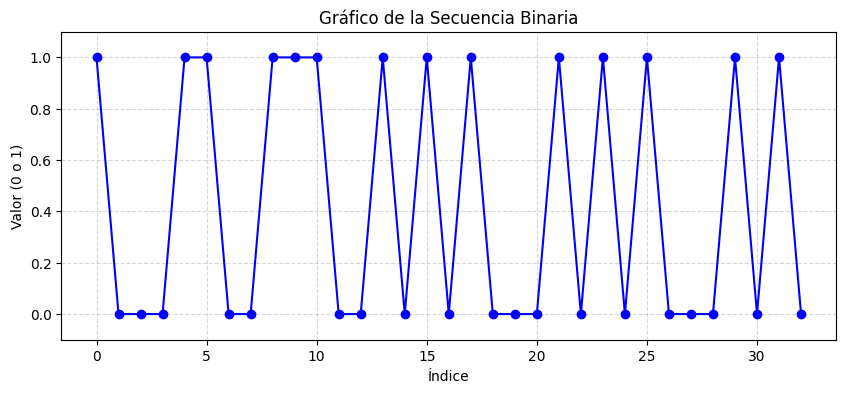

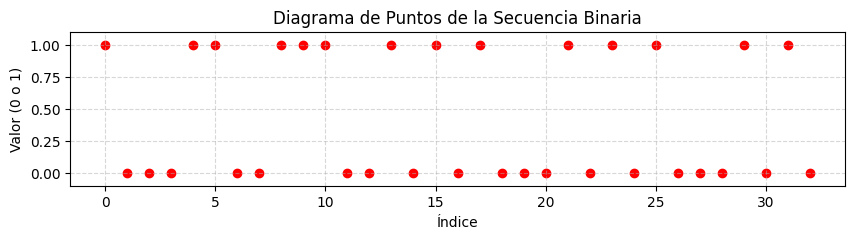

In [12]:
import matplotlib.pyplot as plt

# Lista original de secuencia binaria
secuencia_binaria = [
    1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 
    1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 
    0, 0, 0, 1, 0, 1, 0
]

# Crear un gráfico de líneas
plt.figure(figsize=(10, 4))
plt.plot(secuencia_binaria, marker='o', linestyle='-', color='b')
plt.title("Gráfico de la Secuencia Binaria")
plt.xlabel("Índice")
plt.ylabel("Valor (0 o 1)")
plt.ylim(-0.1, 1.1)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()

# Crear un diagrama de puntos
plt.figure(figsize=(10, 2))
plt.scatter(range(len(secuencia_binaria)), secuencia_binaria, color='r')
plt.title("Diagrama de Puntos de la Secuencia Binaria")
plt.xlabel("Índice")
plt.ylabel("Valor (0 o 1)")
plt.ylim(-0.1, 1.1)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()


__________________________________________________________________________________________________________

Las tendencias en los negocios y la economía a menudo se analizan con la prueba de rachas. 
+ A continuación se incluye el número de salas de cine, listadas en orden por renglón para cada año, 
    + comenzando en 1987 (según datos de la National Association of Theater Owners). 
+ Primero calcule la mediana, 
+ luego reemplace cada valor por A 
    + si está por arriba de la mediana y por D si está por debajo de la mediana. 
+ Después aplique la prueba de rachas a la secuencia resultante de A y D. 
+ ¿Qué sugiere el resultado sobre la tendencia en el número de salas de cine?

    + 20,595  21,632  21,907  22,904  23,740  24,344  24,789  25,830  26,995
    + 28,905  31,050  33,418  36,448  35,567  34,490  35,170  35,361

In [13]:
import numpy as np
import scipy.stats as stats

# Datos del número de salas de cine
datos = [
    20595, 21632, 21907, 22904, 23740, 24344, 24789, 25830, 26995,
    28905, 31050, 33418, 36448, 35567, 34490, 35170, 35361
]

# Calcular la mediana
mediana = np.median(datos)

# Convertir en "A" si está por encima de la mediana y "D" si está por debajo
secuencia_AD = ["A" if x > mediana else "D" for x in datos]

# Convertir "A" en 1 y "D" en 0 para la prueba de rachas
secuencia_binaria = [1 if x == "A" else 0 for x in secuencia_AD]

# Calcular la cantidad de 1's (A) y 0's (D)
n1 = secuencia_binaria.count(1)
n2 = secuencia_binaria.count(0)

# Contar el número de rachas (R)
R = 1  # Empezamos con una racha al menos
for i in range(1, len(secuencia_binaria)):
    if secuencia_binaria[i] != secuencia_binaria[i - 1]:
        R += 1

# Calcular el valor Z de la prueba de rachas
media_R = (2 * n1 * n2) / (n1 + n2) + 1
varianza_R = (2 * n1 * n2 * (2 * n1 * n2 - n1 - n2)) / ((n1 + n2) ** 2 * (n1 + n2 - 1))
Z = (R - media_R) / np.sqrt(varianza_R)

# Calcular el valor p
p_valor = 2 * (1 - stats.norm.cdf(abs(Z)))

# Imprimir resultados
print("Mediana:", mediana)
print("Secuencia A/D:", secuencia_AD)
print("Número de rachas (R):", R)
print("Valor Z:", Z)
print("Valor p:", p_valor)


Mediana: 26995.0
Secuencia A/D: ['D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A']
Número de rachas (R): 2
Valor Z: -3.7564758898615485
Valor p: 0.00017232286469859304


**Interpretación de los Resultados**
+ Mediana: Calculamos la mediana de los datos originales.
+ Secuencia "A" y "D": La secuencia muestra los valores por encima ("A") o por debajo ("D") de la mediana.
+ Prueba de rachas:
+ Si el valor absoluto de Z es menor o igual a 1.96 (para un nivel de significancia del 5%), 
    + no hay evidencia suficiente para rechazar la hipótesis nula de aleatoriedad.
+ Si p es mayor que 0.05, no hay evidencia para rechazar la aleatoriedad.


1. ∣Z∣ > 1.96, se rechaza la hipótesis nula (H₀), lo que sugiere que la secuencia no es aleatoria.
2. El valor p << 0.05 y esto sugiere que si tenemos suficiente evidencia para rechazar la aleatoriedad.
3. Podemos aceptar como un hecho que el numero de salas de cine desde 1987 en adelante ha variado de manera no aleatoria.
4. Además observando los datos y la grafica correspondiente se deduce que las salas han crecido en número con tendencia creciente.

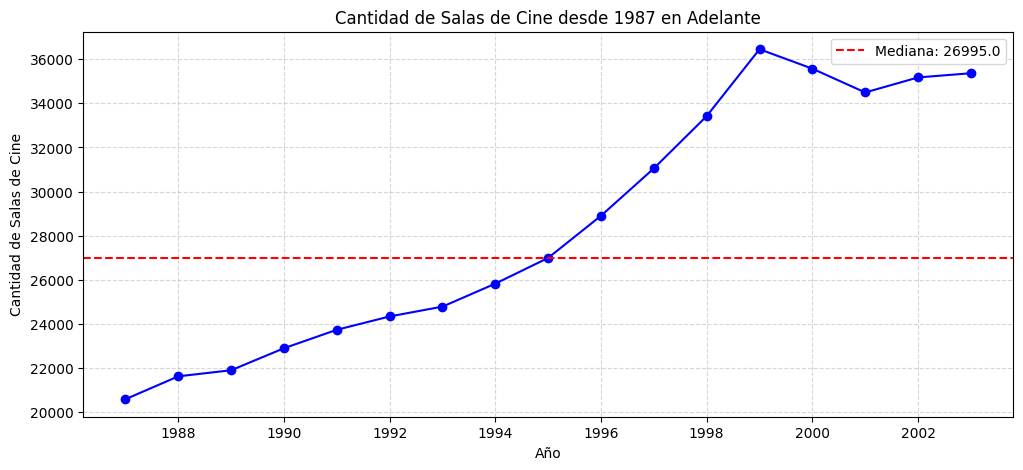

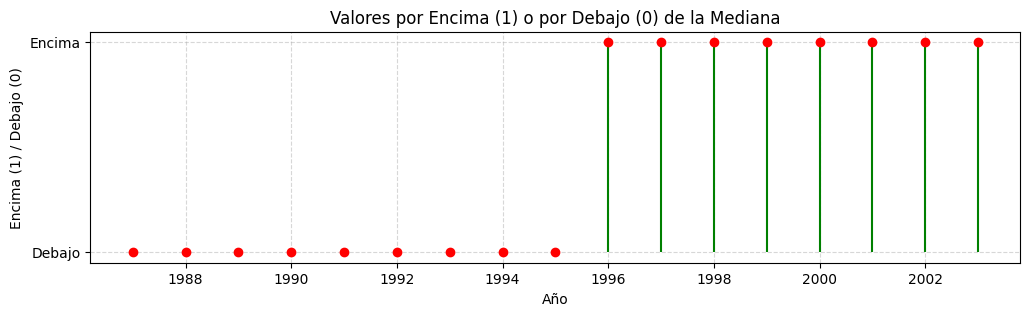

In [16]:
# Código corregido para evitar advertencias y errores
import matplotlib.pyplot as plt
import numpy as np

# Datos del número de salas de cine
datos = [
    20595, 21632, 21907, 22904, 23740, 24344, 24789, 25830, 26995,
    28905, 31050, 33418, 36448, 35567, 34490, 35170, 35361
]

# Calcular la mediana
mediana = np.median(datos)

# Convertir en "A" si está por encima de la mediana y "D" si está por debajo
secuencia_AD = ["A" if x > mediana else "D" for x in datos]

# Crear una secuencia binaria para graficar
secuencia_binaria = [1 if x == "A" else 0 for x in secuencia_AD]

# Años desde 1987 en adelante
anios = np.arange(1987, 1987 + len(datos))

# Gráfico 1: Serie de datos de la cantidad de salas de cine
plt.figure(figsize=(12, 5))
plt.plot(anios, datos, marker='o', linestyle='-', color='b')
plt.axhline(y=mediana, color='r', linestyle='--', label=f'Mediana: {mediana}')
plt.title("Cantidad de Salas de Cine desde 1987 en Adelante")
plt.xlabel("Año")
plt.ylabel("Cantidad de Salas de Cine")
plt.legend()
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()

# Gráfico 2: Secuencia de valores por encima o por debajo de la mediana
plt.figure(figsize=(12, 3))
plt.stem(anios, secuencia_binaria, basefmt=" ", linefmt='g-', markerfmt='ro')
plt.title("Valores por Encima (1) o por Debajo (0) de la Mediana")
plt.xlabel("Año")
plt.ylabel("Encima (1) / Debajo (0)")
plt.yticks([0, 1], ['Debajo', 'Encima'])
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()

_______________________________________________________________________________________________________________________________